# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import operator

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

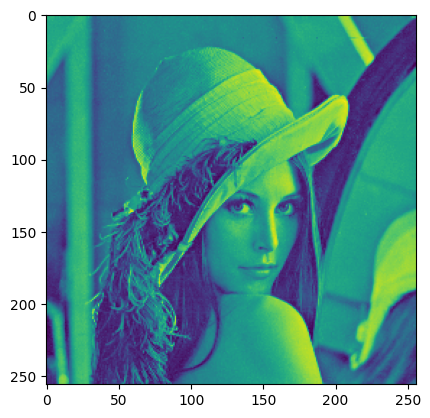

In [2]:
lena = plt.imread('data/lena.png')
plt.imshow(lena.copy())

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [26]:
# Using x and y to determine the position of the pixels and a more elegant version of the boundary conditions 
def meanfilter(img, size):
    result = np.zeros(img.shape)
    n = (size - 1) // 2
    for p in np.ndindex(img.shape[1]-2*n, img.shape[0]-2*n): 
        neighborhood_sum = 0
        for q in np.ndindex(size, size): 
            x = p[1]+q[1]-n
            y = p[0]+q[0]-n
            neighborhood_sum = neighborhood_sum + img[x,y]
        result[p[1]+n,p[0]+n] = neighborhood_sum/(size**2)
    return result

In [30]:
# A little less elegant way of setting up the boundaries 
def meanfilter2(img, size):
    result = np.zeros(img.shape)
    n = (size - 1) // 2
    for p in np.ndindex(img.shape): 
        neighborhood_sum = 0
        neighborhood_mean = 0
        if p[0] < size or p[1] < size or p[0] >= (img.shape[0]-size) or p[1] >= (img.shape[1]-size):
            neighborhood_sum = 0
            result[p[0],p[1]] = neighborhood_mean
        else:
            for q in np.ndindex(size, size): 
                pos = tuple(map(lambda x, y: x + y, p, q))
                neighborhood_sum = neighborhood_sum + img[pos]
                neighborhood_mean = neighborhood_sum/(size**2)
                result[p[0]+n,p[1]+n] = neighborhood_mean
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

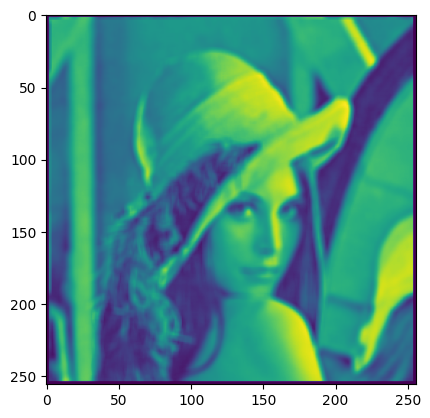

In [47]:
plt.imshow(meanfilter(lena,5))
#plt.imshow(meanfilter2(lena,5))

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

AssertionError: 

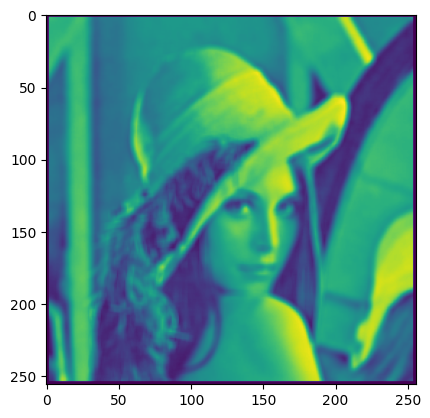

In [29]:
lena_correct = plt.imread('data/lena_meanfilter5.png')
plt.imshow(lena_correct)
assert np.allclose(meanfilter(lena.copy(),5), lena_correct, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [38]:
def medianfilter(img, size):
    result = np.zeros(img.shape)
    n = (size - 1) // 2
    for p in np.ndindex(img.shape[1]-2*n, img.shape[0]-2*n):
        neighborhood = [] 
        for q in np.ndindex(size,size) :
            pos = tuple(map(lambda x, y: x + y, p, q))
            neighborhood.append(img[pos])
            neighborhood = sorted(neighborhood)
        result[p[0]+n,p[1]+n] = np.median(neighborhood)
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

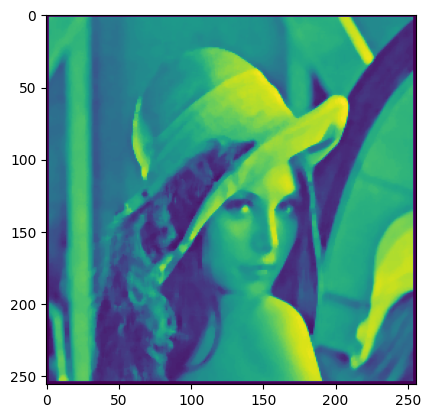

In [39]:
plt.imshow(medianfilter(lena.copy(),5))

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

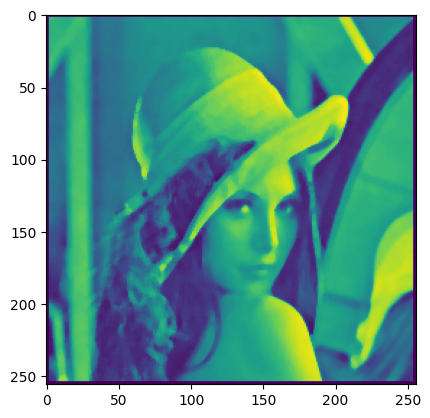

In [22]:

plt.imshow(plt.imread('data/lena_medianfilter5.png'))

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [4]:
import scipy.ndimage 

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

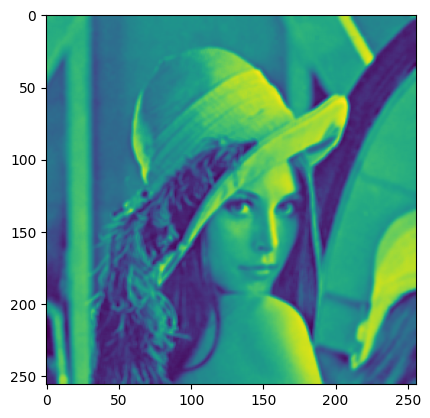

In [36]:
plt.imshow(scipy.ndimage.uniform_filter(lena.copy()))

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

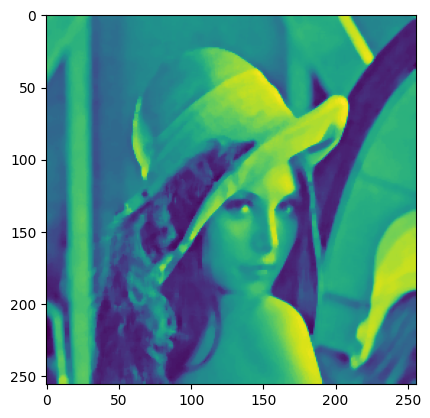

In [8]:
plt.imshow(scipy.ndimage.median_filter(lena.copy(),5))

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

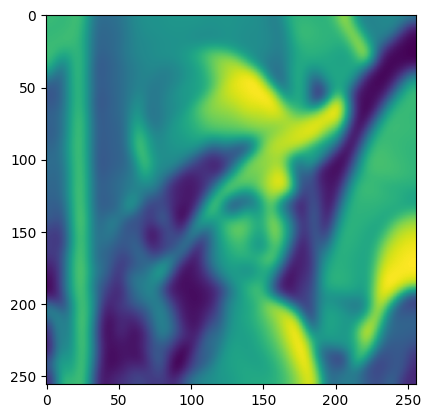

In [9]:
plt.imshow(scipy.ndimage.gaussian_filter(lena.copy(),5))

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

In [ ]:
# The main difference is that the implemented functions don't have the border and probably uses other methods to measure the 

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [58]:
def fastfilter(img, size):
    result = np.zeros(img.shape)
    n = (size - 1) // 2
    for p in np.ndindex(img.shape[1]-2*n, img.shape[0]-2*n): 
        result[p[0]+n,p[1]+n] = img[p[0]:p[0]+(size-1), p[1]:p[1]+(size-1)].mean()
    return result


**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

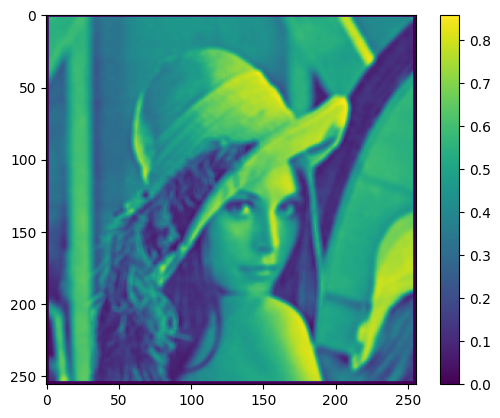

In [59]:
plt.imshow(fastfilter(lena.copy(),5))
plt.colorbar()

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

In [60]:
assert np.allclose(meanfilter(lena.copy(),5), fastfilter(lena.copy(),5), atol=1/255)

AssertionError: 

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: